In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
df = pd.read_csv('risk_factors_cervical_cancer.csv')
print("Number of rows: {}, Number of columns: {}".format(df.shape[0], df.shape[1]))
df.head()

Number of rows: 858, Number of columns: 36


,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


In [2]:
df= df.replace({ "?": np.nan})
df = df.loc[:, df.isnull().mean() < .8]
df=df.dropna()
df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,0.0,0,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
5,42,3.0,23.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0,0,0,0,0,0,0,0,0


In [3]:
from scipy.stats import chi2_contingency
chi_Hinselmann =[]
chi_Schiller =[]
chi_Citology =[]
chi_Biopsy =[]
for i in range(len(df.columns)):
    df.iloc[:,i]=df.iloc[:,i].astype(str).astype(float)
    stat, p, dof, expected = chi2_contingency(pd.crosstab(df.iloc[:,i],df.iloc[:,30]))
    chi_Hinselmann.append(i)
    chi_Hinselmann.append(p)
    stat1, p1, dof1, expected1 = chi2_contingency(pd.crosstab(df.iloc[:,i],df.iloc[:,31]))
    chi_Schiller.append(i)
    chi_Schiller.append(p1)
    stat2, p2, dof2, expected2 = chi2_contingency(pd.crosstab(df.iloc[:,i],df.iloc[:,32]))
    chi_Citology.append(i)
    chi_Citology.append(p2)
    stat3, p3, dof3, expected3 = chi2_contingency(pd.crosstab(df.iloc[:,i],df.iloc[:,33]))
    chi_Biopsy.append(i)
    chi_Biopsy.append(p3)
print(chi_Hinselmann,chi_Schiller,chi_Citology,chi_Biopsy)

[0, 0.5095894942200929, 1, 0.7194274020795164, 2, 0.9415336380440082, 3, 0.2829729512615074, 4, 0.9199862980948473, 5, 0.09200974605526581, 6, 0.09248622695427464, 7, 0.3932313063742293, 8, 0.10382165939720125, 9, 0.20714756438982268, 10, 0.000833313281887106, 11, 0.3190200310861505, 12, 9.176169188122347e-05, 13, 0.1332488470225327, 14, 1.0, 15, 1.0, 16, 0.11921567691967623, 17, 1.0, 18, 1.0, 19, 1.0, 20, 1.0, 21, 1.0, 22, 0.2153401582605287, 23, 1.0, 24, 1.0, 25, 8.437082078323013e-05, 26, 0.0011694673165272658, 27, 1.0, 28, 0.0006777214450327397, 29, 0.02950974706068784, 30, 2.8873632169857163e-142, 31, 1.6483117125434585e-60, 32, 0.0001546433140913668, 33, 8.535920674001858e-39] [0, 2.3570249348616644e-05, 1, 0.8961873421193869, 2, 0.8830537988896714, 3, 0.011901147638193615, 4, 0.5852464187363257, 5, 0.1388169507903139, 6, 0.24468845444570808, 7, 1.0, 8, 0.051650968555169895, 9, 0.022871726546821597, 10, 0.0004084709528468546, 11, 0.01645825871743066, 12, 0.001929140317719333, 13,

In [5]:
print(df.iloc[:,22])
print(df.iloc[:,26])
print(df.iloc[:,28])
print(df.iloc[:,29])

0      0.0
1      0.0
3      0.0
4      0.0
5      0.0
      ... 
853    0.0
854    0.0
855    0.0
856    0.0
857    0.0
Name: STDs:HIV, Length: 668, dtype: float64
0      0.0
1      0.0
3      1.0
4      0.0
5      0.0
      ... 
853    0.0
854    0.0
855    0.0
856    0.0
857    0.0
Name: Dx:Cancer, Length: 668, dtype: float64
0      0.0
1      0.0
3      1.0
4      0.0
5      0.0
      ... 
853    0.0
854    0.0
855    0.0
856    0.0
857    0.0
Name: Dx:HPV, Length: 668, dtype: float64
0      0.0
1      0.0
3      0.0
4      0.0
5      0.0
      ... 
853    0.0
854    0.0
855    0.0
856    0.0
857    0.0
Name: Dx, Length: 668, dtype: float64


In [3]:
from imblearn.over_sampling import SMOTE 
from collections import Counter
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(df.iloc[:,:30], df.iloc[:,32])
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 629, 1: 629})


In [4]:
#split the data with a 75%-25% training-test split
# set the random state for reproducible results

df_X_train, df_X_test, df_y_train, df_y_test = train_test_split(
                                X_res, y_res, test_size=0.2, random_state=671)
#checks
print(df_X_train.shape)
print(df_X_test.shape)
print(df_y_train.shape)
print(df_y_test.shape)

(1006, 30)
(252, 30)
(1006,)
(252,)


In [8]:
df_y_train

927     1.0
97      0.0
1125    1.0
598     0.0
10      0.0
       ... 
579     0.0
48      0.0
758     1.0
687     1.0
289     0.0
Name: Citology, Length: 1006, dtype: float64

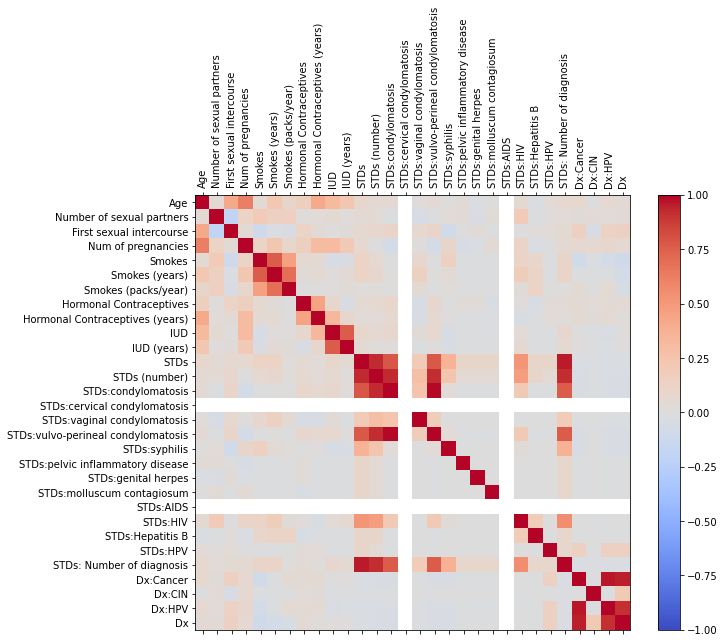

In [9]:
from matplotlib.pyplot import figure
corr = df_X_train.corr()
fig = plt.figure()
fig.set_size_inches(10, 8)
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df_X_train.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df_X_train.columns)
ax.set_yticklabels(df_X_train.columns)

plt.show()

In [10]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import mean_absolute_error
import warnings
from sklearn.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import SelectFromModel
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(df_X_train)
df_X_train = pd.DataFrame(scaler.transform(df_X_train))
warnings.filterwarnings("ignore")
feature_names = np.array(df.columns[:30])

svc1 = GridSearchCV(svm.SVC(), {'kernel':('linear', 'rbf'), 'C':[0.01, 0.1,1,10]})
svc1.fit(df_X_train.iloc[:,[22,26,28,29]], df_y_train.astype('int'))
print(svc1.best_params_)
print(mean_absolute_error(df_y_test.astype('int'), svc1.predict(df_X_test.iloc[:,[22,26,28,29]])))

#svc = svm.SVC(kernel='rbf', C=10)
#sfs1 = sfs(svc, n_features_to_select=6,direction='forward').fit(df_X_train, df_y_train)
#print("Features selected by forward sequential selection: "f"{feature_names[sfs1.get_support()]}")
#svc.fit(df_X_train.iloc[:,[7,8,9,11,12,28]], df_y_train.astype('int'))
#print(mean_absolute_error(df_y_test.astype('int'), svc.predict(df_X_test.iloc[:,[7,8,9,11,12,28]])))

clf = GridSearchCV(SVR(), {'kernel':('linear', 'rbf'), 'C':[0.01, 0.1,1,10], 'gamma':[0.1,0.01,1,0.001]})
clf.fit(df_X_train.iloc[:,[22,26,28,29]], df_y_train.astype('int'))
print(clf.best_params_)

a=SVR(kernel="rbf", C=10, gamma = 1, epsilon = 0.1)
a.fit(df_X_train.iloc[:,[22,26,28,29]], df_y_train.astype('int'))
print(mean_absolute_error(df_y_test.astype('int'), a.predict(df_X_test.iloc[:,[22,26,28,29]])))
#sfs1 = sfs(a, n_features_to_select=6,direction='forward').fit(df_X_train, df_y_train)
#print("Features selected by forward sequential selection: "f"{feature_names[sfs1.get_support()]}")
#a.fit(df_X_train.iloc[:,[0,1,7,8,9,11]], df_y_train.astype('int'))
#print(mean_absolute_error(df_y_test.astype('int'), a.predict(df_X_test.iloc[:,[0,1,7,8,9,11]])))
#sfs1 = sfs(a, n_features_to_select=6,direction='backward').fit(df_X_train, df_y_train)
#print("Features selected by backward sequential selection: "f"{feature_names[sfs1.get_support()]}")
#a.fit(df_X_train.iloc[:,[0,1,2,3,7,8]], df_y_train.astype('int'))
#print(mean_absolute_error(df_y_test.astype('int'), a.predict(df_X_test.iloc[:,[0,1,2,3,7,8]])))

b=KernelRidge(alpha=0.5,kernel='rbf', gamma=0.1)
b.fit(df_X_train.iloc[:,[22,26,28,29]], df_y_train.astype('int'))
print(mean_absolute_error(df_y_test.astype('int'), b.predict(df_X_test.iloc[:,[22,26,28,29]])))
#sfs1 = sfs(b, n_features_to_select=6,direction='forward').fit(df_X_train, df_y_train)
#print("Features selected by forward sequential selection: "f"{feature_names[sfs1.get_support()]}")
#b.fit(df_X_train.iloc[:,[0,1,7,9,11,28]], df_y_train.astype('int'))
#print(mean_absolute_error(df_y_test.astype('int'), b.predict(df_X_test.iloc[:,[0,1,7,9,11,28]])))
#sfs1 = sfs(b, n_features_to_select=6,direction='backward').fit(df_X_train, df_y_train)
#print("Features selected by backward sequential selection: "f"{feature_names[sfs1.get_support()]}")
#b.fit(df_X_train.iloc[:,[2,3,4,7,8,16]], df_y_train.astype('int'))
#print(mean_absolute_error(df_y_test.astype('int'), b.predict(df_X_test.iloc[:,[2,3,4,7,8,16]])))


{'C': 10, 'kernel': 'rbf'}
0.5
{'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}
0.7037599874866952
0.480930027037305


backward results are similar to chi sqaured ones, gridsearchcv didnt change a lot on svr

In [11]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
lr = GridSearchCV(LogisticRegression(), {'penalty':('l1', 'l2'), 'C':[0.1,1,10]})
lr.fit(df_X_train.iloc[:,[22,26,28,29]], df_y_train.astype('int'))
print(lr.best_params_)
print(mean_absolute_error(df_y_test.astype('int'), lr.predict(df_X_test.iloc[:,[22,26,28,29]])))

{'C': 10, 'penalty': 'l2'}
0.5


In [12]:
from sklearn.neural_network import MLPClassifier
mlp = GridSearchCV(MLPClassifier(), {'hidden_layer_sizes':((100,), (50,),(10,)), 'alpha':[1e-5,1e-4,1e-3,1e-6],'solver':['lbfgs', 'sgd', 'adam']})
mlp.fit(df_X_train.iloc[:,[22,26,28,29]], df_y_train.astype('int'))
print(mlp.best_params_)
print(mean_absolute_error(df_y_test.astype('int'), mlp.predict(df_X_test.iloc[:,[22,26,28,29]])))

{'alpha': 1e-05, 'hidden_layer_sizes': (100,), 'solver': 'lbfgs'}
0.5


In [13]:
from sklearn.ensemble import RandomForestClassifier
rf = GridSearchCV(RandomForestClassifier(), {'n_estimators':(10, 50, 100), 'max_depth':[2,5,10],'random_state':[0,2,5]})
rf.fit(df_X_train.iloc[:,[22,26,28,29]], df_y_train.astype('int'))
print(rf.best_params_)
print(mean_absolute_error(df_y_test.astype('int'), rf.predict(df_X_test.iloc[:,[22,26,28,29]])))

{'max_depth': 5, 'n_estimators': 10, 'random_state': 0}
0.5


In [14]:
from xgboost import XGBClassifier
xgb=XGBClassifier().fit(df_X_train.iloc[:,[22,26,28,29]], df_y_train.astype('int'))
print(mean_absolute_error(df_y_test.astype('int'), xgb.predict(df_X_test.iloc[:,[22,26,28,29]])))

[20:39:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.5


In [5]:
from sklearn import linear_model
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import mean_absolute_error
import warnings
from sklearn.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import SelectFromModel
from sklearn import preprocessing
clf = GridSearchCV(linear_model.Lasso(), {'alpha':(0.5,0.1,1), 'max_iter':[100,1000],'selection':['cyclic', 'random']})
clf.fit(df_X_train.iloc[:,[22,26,28,29]], df_y_train.astype('int'))
print(clf.best_params_)
print(mean_absolute_error(df_y_test.astype('int'), clf.predict(df_X_test.iloc[:,[22,26,28,29]])))

{'alpha': 0.5, 'max_iter': 100, 'selection': 'cyclic'}
0.5


In [35]:
from sklearn.model_selection import cross_val_score
scores_df = pd.DataFrame(columns=["R^2 on Fold 1", "R^2 on Fold 2", "R^2 on Fold 3", "R^2 on Fold 4","R^2 on Fold 5","Mean R^2"])
print("\nCross Validation:")
svc_scores = list(cross_val_score(svm.SVC(kernel='linear', C=0.01), df_X_train.iloc[:,[22,26,28,29]], df_y_train.astype('int'), cv=5))
svc_scores.append(np.mean(svc_scores))
scores_df.loc["SVC"] = svc_scores
rf_scores = list(cross_val_score(RandomForestClassifier(max_depth=2, n_estimators=10, random_state=0), df_X_train.iloc[:,[22,26,28,29]], df_y_train.astype('int'), cv=5))
rf_scores.append(np.mean(rf_scores))
scores_df.loc["Random Forest"] = rf_scores
lr_scores = list(cross_val_score(LogisticRegression(C=0.1, penalty='l2'), df_X_train.iloc[:,[22,26,28,29]], df_y_train.astype('int'), cv=5))
lr_scores.append(np.mean(lr_scores))
scores_df.loc["Logistic Regression"] = lr_scores
kr_scores = list(cross_val_score(KernelRidge(alpha=0.5,kernel='rbf', gamma=0.1), df_X_train.iloc[:,[22,26,28,29]], df_y_train.astype('int'), cv=5))
kr_scores.append(np.mean(kr_scores))
scores_df.loc["Kernel Ridge"] = kr_scores
mlp_scores = list(cross_val_score(MLPClassifier(alpha=1e-05, hidden_layer_sizes=50, solver='sgd'), df_X_train.iloc[:,[22,26,28,29]], df_y_train.astype('int'), cv=5))
mlp_scores.append(np.mean(mlp_scores))
scores_df.loc["MLP"] = mlp_scores
xgb_scores = list(cross_val_score(XGBClassifier(), df_X_train.iloc[:,[22,26,28,29]], df_y_train.astype('int'), cv=5))
xgb_scores.append(np.mean(xgb_scores))
scores_df.loc["XGB"] = xgb_scores
clf_scores = list(cross_val_score(linear_model.Lasso(), df_X_train.iloc[:,[22,26,28,29]], df_y_train.astype('int'), cv=5))
clf_scores.append(np.mean(xgb_scores))
scores_df.loc["Lasso"] = clf_scores
svr_scores = list(cross_val_score(SVR(kernel="rbf", C=10, gamma = 1, epsilon = 0.1), df_X_train.iloc[:,[22,26,28,29]], df_y_train.astype('int'), cv=5))
svr_scores.append(np.mean(svr_scores))
scores_df.loc["SVR"] = svr_scores
print(scores_df)


Cross Validation:
[12:00:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:00:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:00:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:00:52] WARNING: C:/Users/Administrator/workspac

In [6]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score
#print("Random Forest AUC: {}".format(roc_auc_score(np.array(df_y_test), rf.predict(df_X_test.iloc[:,[22,26,28,29]]))))
#print("Logistic Regression AUC: {}".format(roc_auc_score(np.array(df_y_test), lr.predict(df_X_test.iloc[:,[22,26,28,29]]))))
#print("SVC AUC: {}".format(roc_auc_score(np.array(df_y_test), svc1.predict(df_X_test.iloc[:,[22,26,28,29]]))))
#print("MLP AUC: {}".format(roc_auc_score(np.array(df_y_test), mlp.predict(df_X_test.iloc[:,[22,26,28,29]]))))
#print("XGB AUC: {}".format(roc_auc_score(np.array(df_y_test), xgb.predict(df_X_test.iloc[:,[22,26,28,29]]))))
print("lasso AUC: {}".format(roc_auc_score(np.array(df_y_test), clf.predict(df_X_test.iloc[:,[22,26,28,29]]))))

lasso AUC: 0.5


In [17]:
from sklearn.metrics import classification_report
print(classification_report(df_y_test,rf.predict(df_X_test.iloc[:,[22,26,28,29]])))
print(classification_report(df_y_test,lr.predict(df_X_test.iloc[:,[22,26,28,29]])))
print(classification_report(df_y_test,svc1.predict(df_X_test.iloc[:,[22,26,28,29]])))
print(classification_report(df_y_test,mlp.predict(df_X_test.iloc[:,[22,26,28,29]])))
print(classification_report(df_y_test,xgb.predict(df_X_test.iloc[:,[22,26,28,29]])))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       126
         1.0       0.50      1.00      0.67       126

    accuracy                           0.50       252
   macro avg       0.25      0.50      0.33       252
weighted avg       0.25      0.50      0.33       252

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       126
         1.0       0.50      1.00      0.67       126

    accuracy                           0.50       252
   macro avg       0.25      0.50      0.33       252
weighted avg       0.25      0.50      0.33       252

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       126
         1.0       0.50      1.00      0.67       126

    accuracy                           0.50       252
   macro avg       0.25      0.50      0.33       252
weighted avg       0.25      0.50      0.33       252

              preci